In [39]:
from datasets import load_dataset

In [40]:
ds = load_dataset("Mir-2002/python_code_docstring_ast_corpus")

In [41]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.DataFrame(ds['train'])
print(f'Columns: {df.columns.tolist()}')
print(f'Shape: {df.shape}')

Columns: ['library', 'name', 'source_code', 'docstring', 'type', 'file_path', 'ast_data']
Shape: (24175, 7)


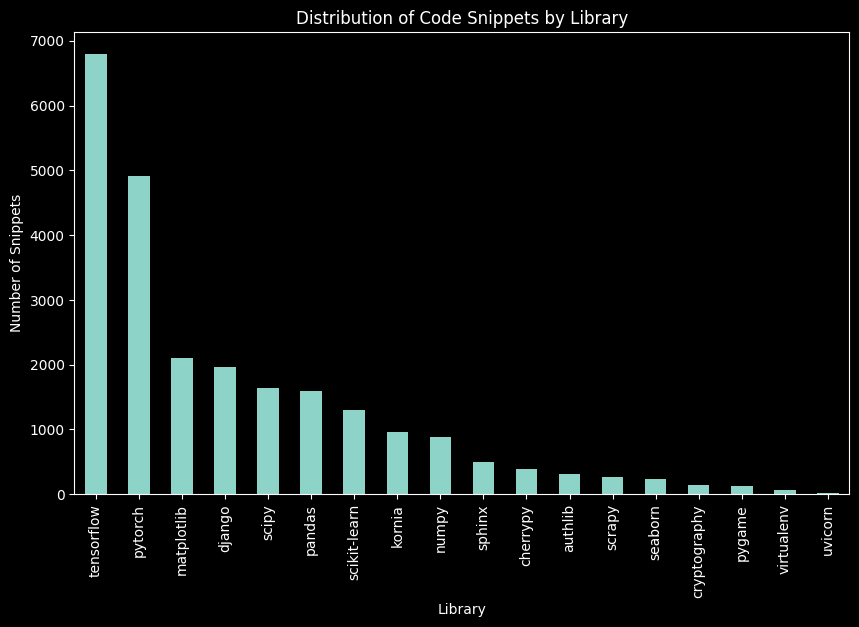

In [43]:
# show distribution of code snippet by library
library_counts = df['library'].value_counts()
plt.figure(figsize=(10, 6))
library_counts.plot(kind='bar')
plt.title('Distribution of Code Snippets by Library')
plt.xlabel('Library')
plt.ylabel('Number of Snippets')
plt.show()

In [49]:
def generate_dataset(dataset, output_file="test_dataset.json", sample_size=50):
    """
    Downloads samples from the Hugging Face dataset and saves them to a local JSON file.
    """
    # Take the specified number of samples
    sample_data = list(dataset.take(sample_size))

    prepared_data = []
    for item in sample_data:
        # Check for keys (code/docstring are the expected keys for this corpus)
        if 'source_code' in item and 'docstring' in item:
            prepared_data.append({
                "source_code": item['source_code'],  # The input code
                "docstring": item['docstring']  # The expected docstring
            })

    # Save to JSON
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(prepared_data, f, indent=2)

    print(f"Saved {len(prepared_data)} samples to {output_file}")

In [50]:
generate_dataset(ds['train'], sample_size=50)

Saved 50 samples to test_dataset.json
